In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from network import *

In [3]:
from collections import Counter
import math


In [4]:
from plot_n_fit import *

In [5]:
coauthorNetwork = CoauthorNetwork.load_with_loader("./data/out_test.txt", parse_dataset_file);


Uniq authors: 42619


pfinal: [ 2.89429967 -0.58018467]
covar: [[ 0.00221648 -0.00052272]
 [-0.00052272  0.00012459]]
Ampli = 783.97 +/-  8.75
Index = -0.58 +/-  0.05


/home/generall/sources/upwork/ahmed/plot_n_fit.py:8: RuntimeWarning: divide by zero encountered in power
  powerlaw = lambda x, amp, index: amp * (x**index)


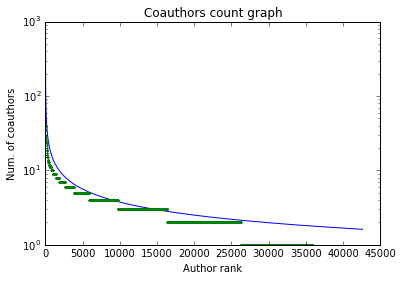

Power_divergenceResult(statistic=139203.9674675313, pvalue=0.0)
pfinal: [ 0.33731237 -0.07872297]
covar: [[ 0.00221648 -0.00052272]
 [-0.00052272  0.00012459]]
Ampli =  2.17 +/-  0.02
Index = -0.08 +/-  0.05


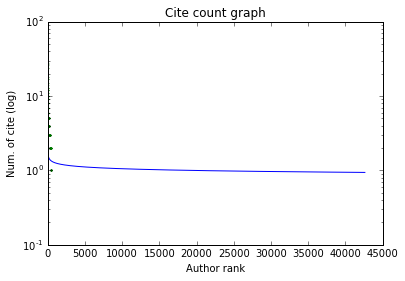

Power_divergenceResult(statistic=321289.71282575384, pvalue=0.0)


In [6]:
def neighbour_rank(graph, log = False, doFit=False):
    vals = sorted([len(graph.neighbors(author)) for author in graph.nodes()], reverse=True)
    plor_rank(vals, plot_xy_dot, log=log, doFit=doFit)

plot_labels("Author rank", "Num. of coauthors", "Coauthors count graph")
neighbour_rank(coauthorNetwork.gr, log=True, doFit=True)

plot_labels("Author rank", "Num. of cite (log)", "Cite count graph")
neighbour_rank(coauthorNetwork.cgr, log=True, doFit=True)

pfinal: [ 5.0726853  -2.84887463]
covar: [[ 0.28835477 -0.22402061]
 [-0.22402061  0.19259273]]
Ampli = 118218.46 +/- 51880.63
Index = -2.85 +/-  0.54


/home/generall/sources/upwork/ahmed/plot_n_fit.py:8: RuntimeWarning: divide by zero encountered in power
  powerlaw = lambda x, amp, index: amp * (x**index)


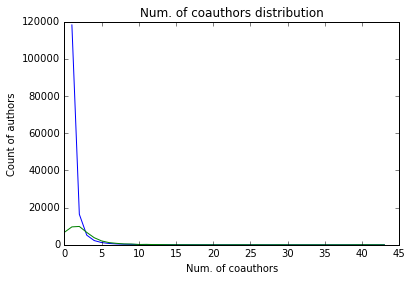

Power_divergenceResult(statistic=212001.27612097887, pvalue=0.0)
pfinal: [ 3.43893389 -2.34416446]
covar: [[ 0.35580659 -0.31619438]
 [-0.31619438  0.32214669]]
Ampli = 2747.48 +/- 1559.41
Index = -2.34 +/-  0.60


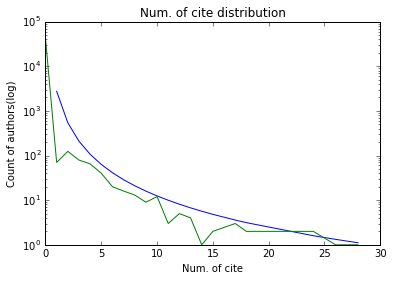

Power_divergenceResult(statistic=874319.76501091057, pvalue=0.0)


In [7]:
def neighbour_dist(graph, log = False, doFit=False):
    d = sorted(Counter([len(graph.neighbors(author)) for author in graph.nodes()]).items(), reverse=True)
    plot_pairs(d, plot_xy_line, log=log, doFit=doFit)

plot_labels("Num. of coauthors", "Count of authors", "Num. of coauthors distribution")
neighbour_dist(coauthorNetwork.gr, doFit=True)

plot_labels("Num. of cite", "Count of authors(log)", "Num. of cite distribution")
neighbour_dist(coauthorNetwork.cgr, log=True, doFit=True)


pfinal: [ 0.42769404 -0.09929889]
covar: [[ 0.00221648 -0.00052272]
 [-0.00052272  0.00012459]]
Ampli =  2.68 +/-  0.03
Index = -0.10 +/-  0.05


/home/generall/sources/upwork/ahmed/plot_n_fit.py:8: RuntimeWarning: divide by zero encountered in power
  powerlaw = lambda x, amp, index: amp * (x**index)


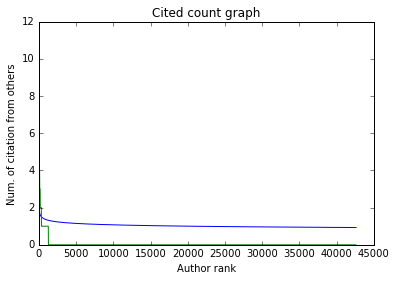

Power_divergenceResult(statistic=108390.71231476749, pvalue=0.0)
pfinal: [ 4.24603309 -3.73439492]
covar: [[ 0.51884188 -0.59966071]
 [-0.59966071  0.82568523]]
Ampli = 17621.10 +/- 16011.81
Index = -3.73 +/-  0.72


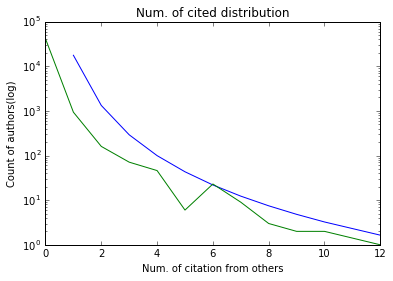

Power_divergenceResult(statistic=439318.15488397185, pvalue=0.0)


In [8]:
def in_degree_rank(graph, log=False, doFit=False):
    vals = sorted([graph.in_degree(author) for author in graph.nodes()], reverse=True)
    plor_rank(vals, plot_xy_line,log=log,doFit=doFit)

def in_degree_dist(graph, log=False, doFit=False):
    d = sorted(Counter([graph.in_degree(author) for author in graph.nodes()]).items(), reverse=True)
    plot_pairs(d, plot_xy_line, log=log,doFit=doFit)
    

plot_labels("Author rank", "Num. of citation from others", "Cited count graph")
in_degree_rank(coauthorNetwork.cgr, doFit=True)

plot_labels("Num. of citation from others", "Count of authors(log)", "Num. of cited distribution")
in_degree_dist(coauthorNetwork.cgr,log=True, doFit=True)


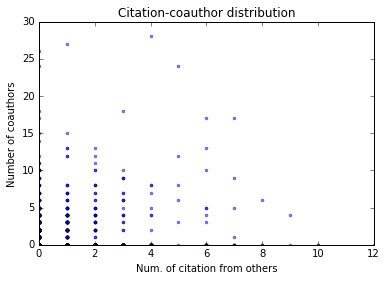

Power_divergenceResult(statistic=321289.71282575367, pvalue=0.0)


In [9]:
def coauth_cite_plot(network):
    p = [(network.cgr.in_degree(author), len(network.cgr.neighbors(author)))
     for author in network.author_to_article.keys()]
    plot_pairs(p, plot_xy_point)

plot_labels("Num. of citation from others", "Number of coauthors", "Citation-coauthor distribution")
coauth_cite_plot(coauthorNetwork)

pfinal: [ 1.18939437 -0.20311164]
covar: [[ 0.00221648 -0.00052272]
 [-0.00052272  0.00012459]]
Ampli = 15.47 +/-  0.17
Index = -0.20 +/-  0.05


/home/generall/sources/upwork/ahmed/plot_n_fit.py:8: RuntimeWarning: divide by zero encountered in power
  powerlaw = lambda x, amp, index: amp * (x**index)


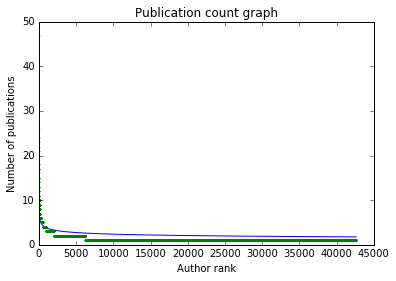

Power_divergenceResult(statistic=34201.03295310519, pvalue=1.0)
pfinal: [ 4.79818344 -3.18099109]
covar: [[ 0.46587213 -0.38703484]
 [-0.38703484  0.34930902]]
Ampli = 62832.37 +/- 37135.42
Index = -3.18 +/-  0.68


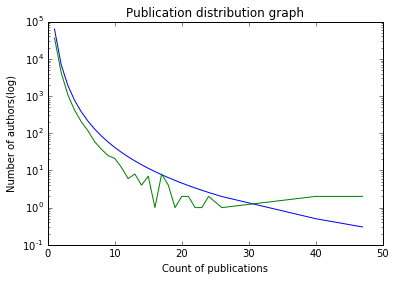

Power_divergenceResult(statistic=807896.16964264761, pvalue=0.0)


In [10]:
def pub_rank(network, log = False, doFit=False):
    r = sorted([len(x) for x in network.author_to_article.values()], reverse=True)
    plor_rank(r, plot_xy_dot, log = log,doFit=doFit)

def pub_dist(network, log = False, doFit=False):
    r = sorted(Counter([len(x) for x in network.author_to_article.values()]).items(), reverse=True)
    plot_pairs(r, plot_xy_line, log = log,doFit=doFit)
    
plot_labels("Author rank", "Number of publications", "Publication count graph")
pub_rank(coauthorNetwork, doFit=True)


plot_labels("Count of publications", "Number of authors(log)", "Publication distribution graph")
pub_dist(coauthorNetwork, log = True, doFit=True)

pfinal: [ 0.55462675 -0.05734789]
covar: [[  1.79605501e-03  -4.12564625e-04]
 [ -4.12564625e-04   9.57297469e-05]]
Ampli =  3.59 +/-  0.04
Index = -0.06 +/-  0.04


/home/generall/sources/upwork/ahmed/plot_n_fit.py:8: RuntimeWarning: divide by zero encountered in power
  powerlaw = lambda x, amp, index: amp * (x**index)


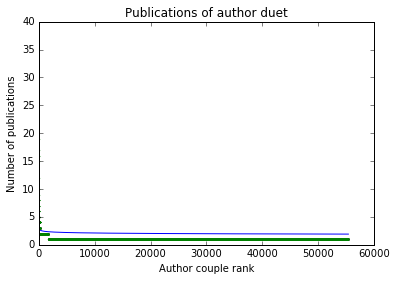

Power_divergenceResult(statistic=6406.1064113440807, pvalue=1.0)
pfinal: [ 4.2983997  -3.28035561]
covar: [[ 0.59937858 -0.56075429]
 [-0.56075429  0.58569179]]
Ampli = 19879.24 +/- 15213.68
Index = -3.28 +/-  0.77


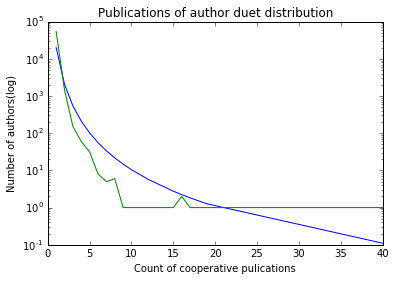

Power_divergenceResult(statistic=778494.75193407026, pvalue=0.0)


In [11]:
def coathorship_rank(network, log = False, doFit=False):
    r = sorted([x for x in network.coauth_count.values()], reverse=True)
    plor_rank(r, plot_xy_dot, log=log, doFit=doFit)
    
def coathorship_dist(network, log = False, doFit=False):
    r = sorted(Counter([x for x in network.coauth_count.values()]).items(), reverse=True)
    plot_pairs(r, plot_xy_line, log=log, doFit=doFit)
    
plot_labels("Author couple rank", "Number of publications", "Publications of author duet")
coathorship_rank(coauthorNetwork, log=False, doFit=True)


plot_labels("Count of cooperative pulications", "Number of authors(log)", "Publications of author duet distribution")
coathorship_dist(coauthorNetwork, log = True, doFit=True)
    

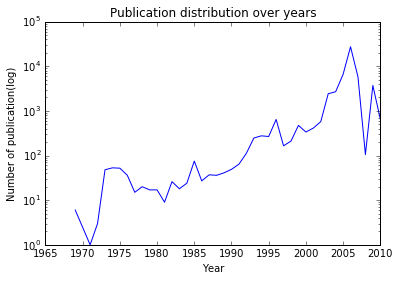

Power_divergenceResult(statistic=597637.83016160002, pvalue=0.0)


In [12]:
def publication_year_dist(network, log=False):
    p = []
    for x in network.author_year.values():
        for y in x:
            if y > 1000:
                p.append(y)
    p = sorted(Counter(p).items(), key= lambda x: x[0], reverse=False)
    
    plot_pairs(p, plot_xy_line, log=log)

plot_labels("Year", "Number of publication(log)", "Publication distribution over years")

publication_year_dist(coauthorNetwork, log=True)